In [ ]:
! pip install --quiet

ERROR: You must give at least one requirement to install (see "pip help install")


In [ ]:
!pip install pyqt5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.4 MB 3.1 MB/s 
     |████████████████████████████████| 344 kB 54.1 MB/s 
     |████████████████████████████████| 59.9 MB 1.2 MB/s 


In [ ]:
!pip install pyqtwebengine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 230 kB 5.0 MB/s 
     |████████████████████████████████| 67.5 MB 92 kB/s 


In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.utils.data as data
%matplotlib inline
from IPython.display import set_matplotlib_formats
from matplotlib.colors import to_rgba
from torch import Tensor
from tqdm.notebook import tqdm # Progress bar
set_matplotlib_formats("svg", "pdf")

In [ ]:
import torch
import numpy as np
from torch import optim

"""
Downloading may take a few moments, and you should see your progress as the data is loading.
You may also choose to change the batch_size if you want to load more data at a time.
"""

from torchvision import datasets
import torchvision.transforms as transforms

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,num_workers=num_workers)

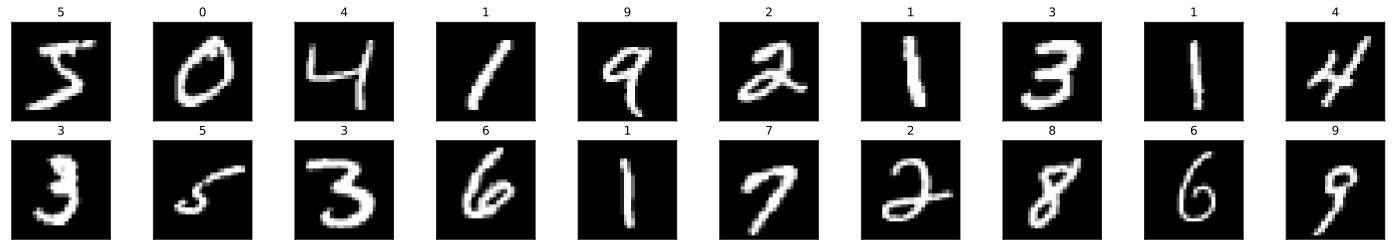

In [ ]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))
  

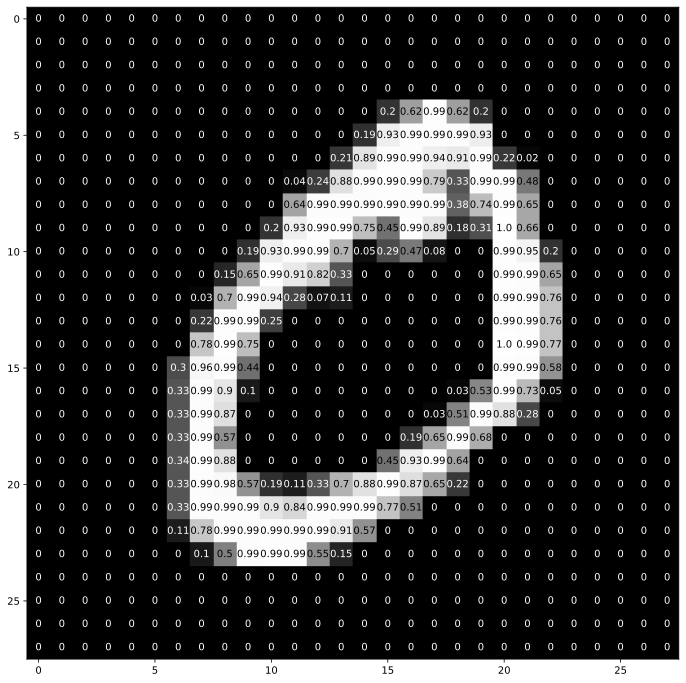

In [ ]:
img = np.squeeze(images[1])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

In [ ]:
    
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # linear layer (784 -> 1 hidden node)
        h1,h2 = 512,512
        self.fc1 = nn.Linear(28 * 28, h1)
        self.fc2 = nn.Linear(h1,h2)
        self.fc3 = nn.Linear(h2,10)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x

In [ ]:
model = Net()
print(model)


"""
Specify Loss Function and Optimizer
we use cross-entropy loss for classification. 
you can see that PyTorch's cross entropy function applies a softmax funtion 
to the output layer and then calculates the log loss.
"""
# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [ ]:
n_epochs = 10  # suggest training between 20-50 epochs

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.sampler)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch+1, train_loss))

Epoch: 1 	Training Loss: 2.215325
Epoch: 2 	Training Loss: 1.715634
Epoch: 3 	Training Loss: 0.956844
Epoch: 4 	Training Loss: 0.662584
Epoch: 5 	Training Loss: 0.547010
Epoch: 6 	Training Loss: 0.485092
Epoch: 7 	Training Loss: 0.447161
Epoch: 8 	Training Loss: 0.419492
Epoch: 9 	Training Loss: 0.396504
Epoch: 10 	Training Loss: 0.378353
Epoch: 11 	Training Loss: 0.363240
Epoch: 12 	Training Loss: 0.350347
Epoch: 13 	Training Loss: 0.340059
Epoch: 14 	Training Loss: 0.328084
Epoch: 15 	Training Loss: 0.319023
Epoch: 16 	Training Loss: 0.310028
Epoch: 17 	Training Loss: 0.300866
Epoch: 18 	Training Loss: 0.294138
Epoch: 19 	Training Loss: 0.287549
Epoch: 20 	Training Loss: 0.278826
Epoch: 21 	Training Loss: 0.270970
Epoch: 22 	Training Loss: 0.265136
Epoch: 23 	Training Loss: 0.258869
Epoch: 24 	Training Loss: 0.252895
Epoch: 25 	Training Loss: 0.246737
Epoch: 26 	Training Loss: 0.241695
Epoch: 27 	Training Loss: 0.236111
Epoch: 28 	Training Loss: 0.230854
Epoch: 29 	Training Loss: 0.2

In [ ]:
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for *evaluation*

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(len(target)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))


Test Loss: 0.192691

Test Accuracy of     0: 98% (964/980)
Test Accuracy of     1: 98% (1113/1135)
Test Accuracy of     2: 93% (965/1032)
Test Accuracy of     3: 93% (948/1010)
Test Accuracy of     4: 94% (928/982)
Test Accuracy of     5: 91% (816/892)
Test Accuracy of     6: 95% (917/958)
Test Accuracy of     7: 93% (959/1028)
Test Accuracy of     8: 91% (894/974)
Test Accuracy of     9: 92% (931/1009)

Test Accuracy (Overall): 94% (9435/10000)


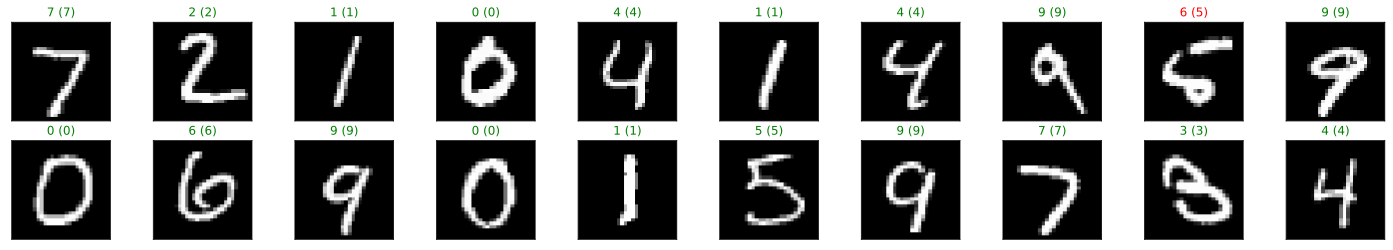

In [ ]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))